In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)

In [87]:
dataset = pd.read_csv('/kaggle/input/air-quality-data-in-india/city_day.csv')

# EDA

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [89]:
dataset.sample(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
25583,Patna,2020-02-14,101.55,209.41,67.53,48.16,113.68,45.26,1.36,6.74,14.65,3.37,13.60,3.35,251.0,Poor
7613,Chandigarh,2019-11-24,44.90,76.48,2.60,18.03,20.07,5.00,0.45,10.79,8.99,5.24,1.92,1.19,107.0,Moderate
12774,Gurugram,2016-12-05,252.46,NaN,7.89,10.14,NaN,NaN,NaN,12.73,15.31,2.11,21.05,NaN,421.0,Severe
12725,Gurugram,2016-10-17,67.06,NaN,NaN,NaN,NaN,NaN,0.49,4.76,23.57,NaN,NaN,NaN,102.0,Moderate
17648,Jaipur,2020-05-10,47.55,146.77,4.33,14.02,16.10,19.76,0.65,9.67,54.73,0.58,0.63,NaN,110.0,Moderate


In [90]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [91]:
dataset.shape

(29531, 16)

In [61]:
dataset.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [62]:
dataset.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [63]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

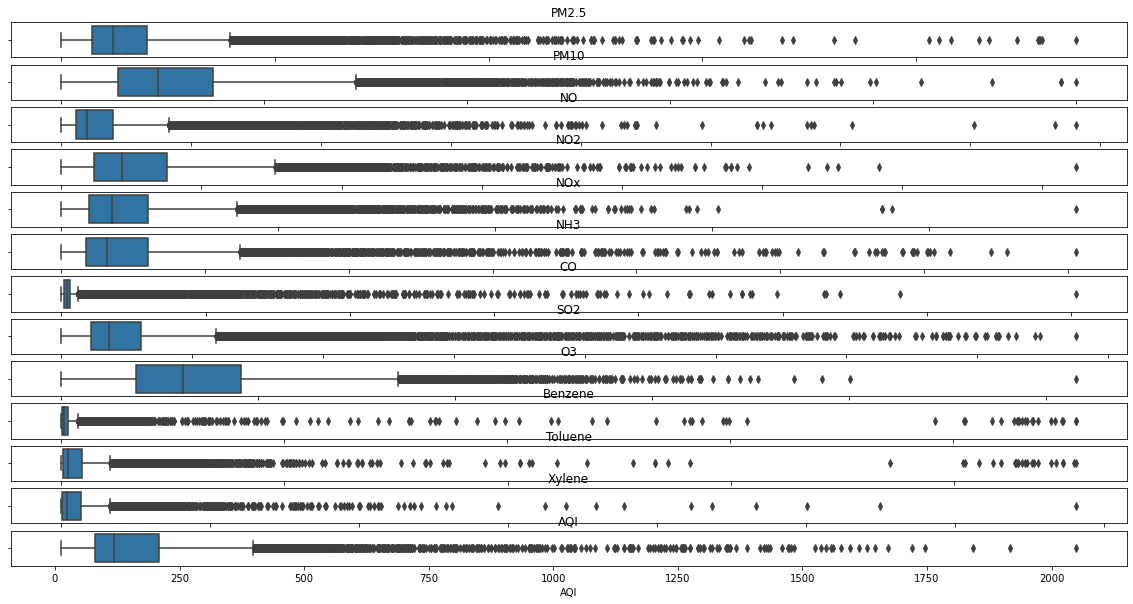

In [64]:
i = 1

for ele in features:
    plt.subplot(13,1,i)
    plt.title(ele)
    sns.boxplot(x=ele,data=dataset)
    i+= 1

<AxesSubplot:>

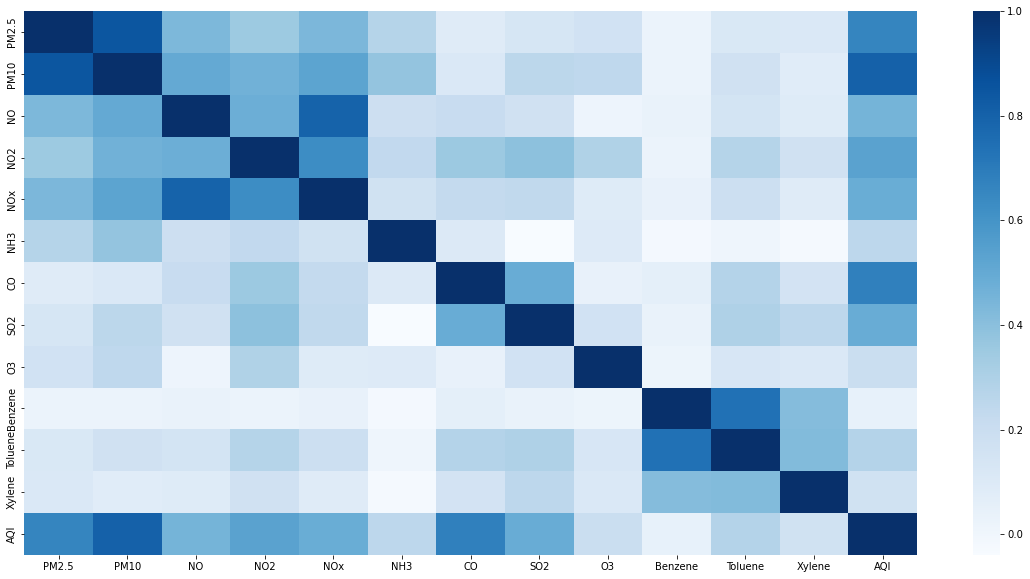

In [65]:
sns.heatmap(dataset.corr(),cmap='Blues')

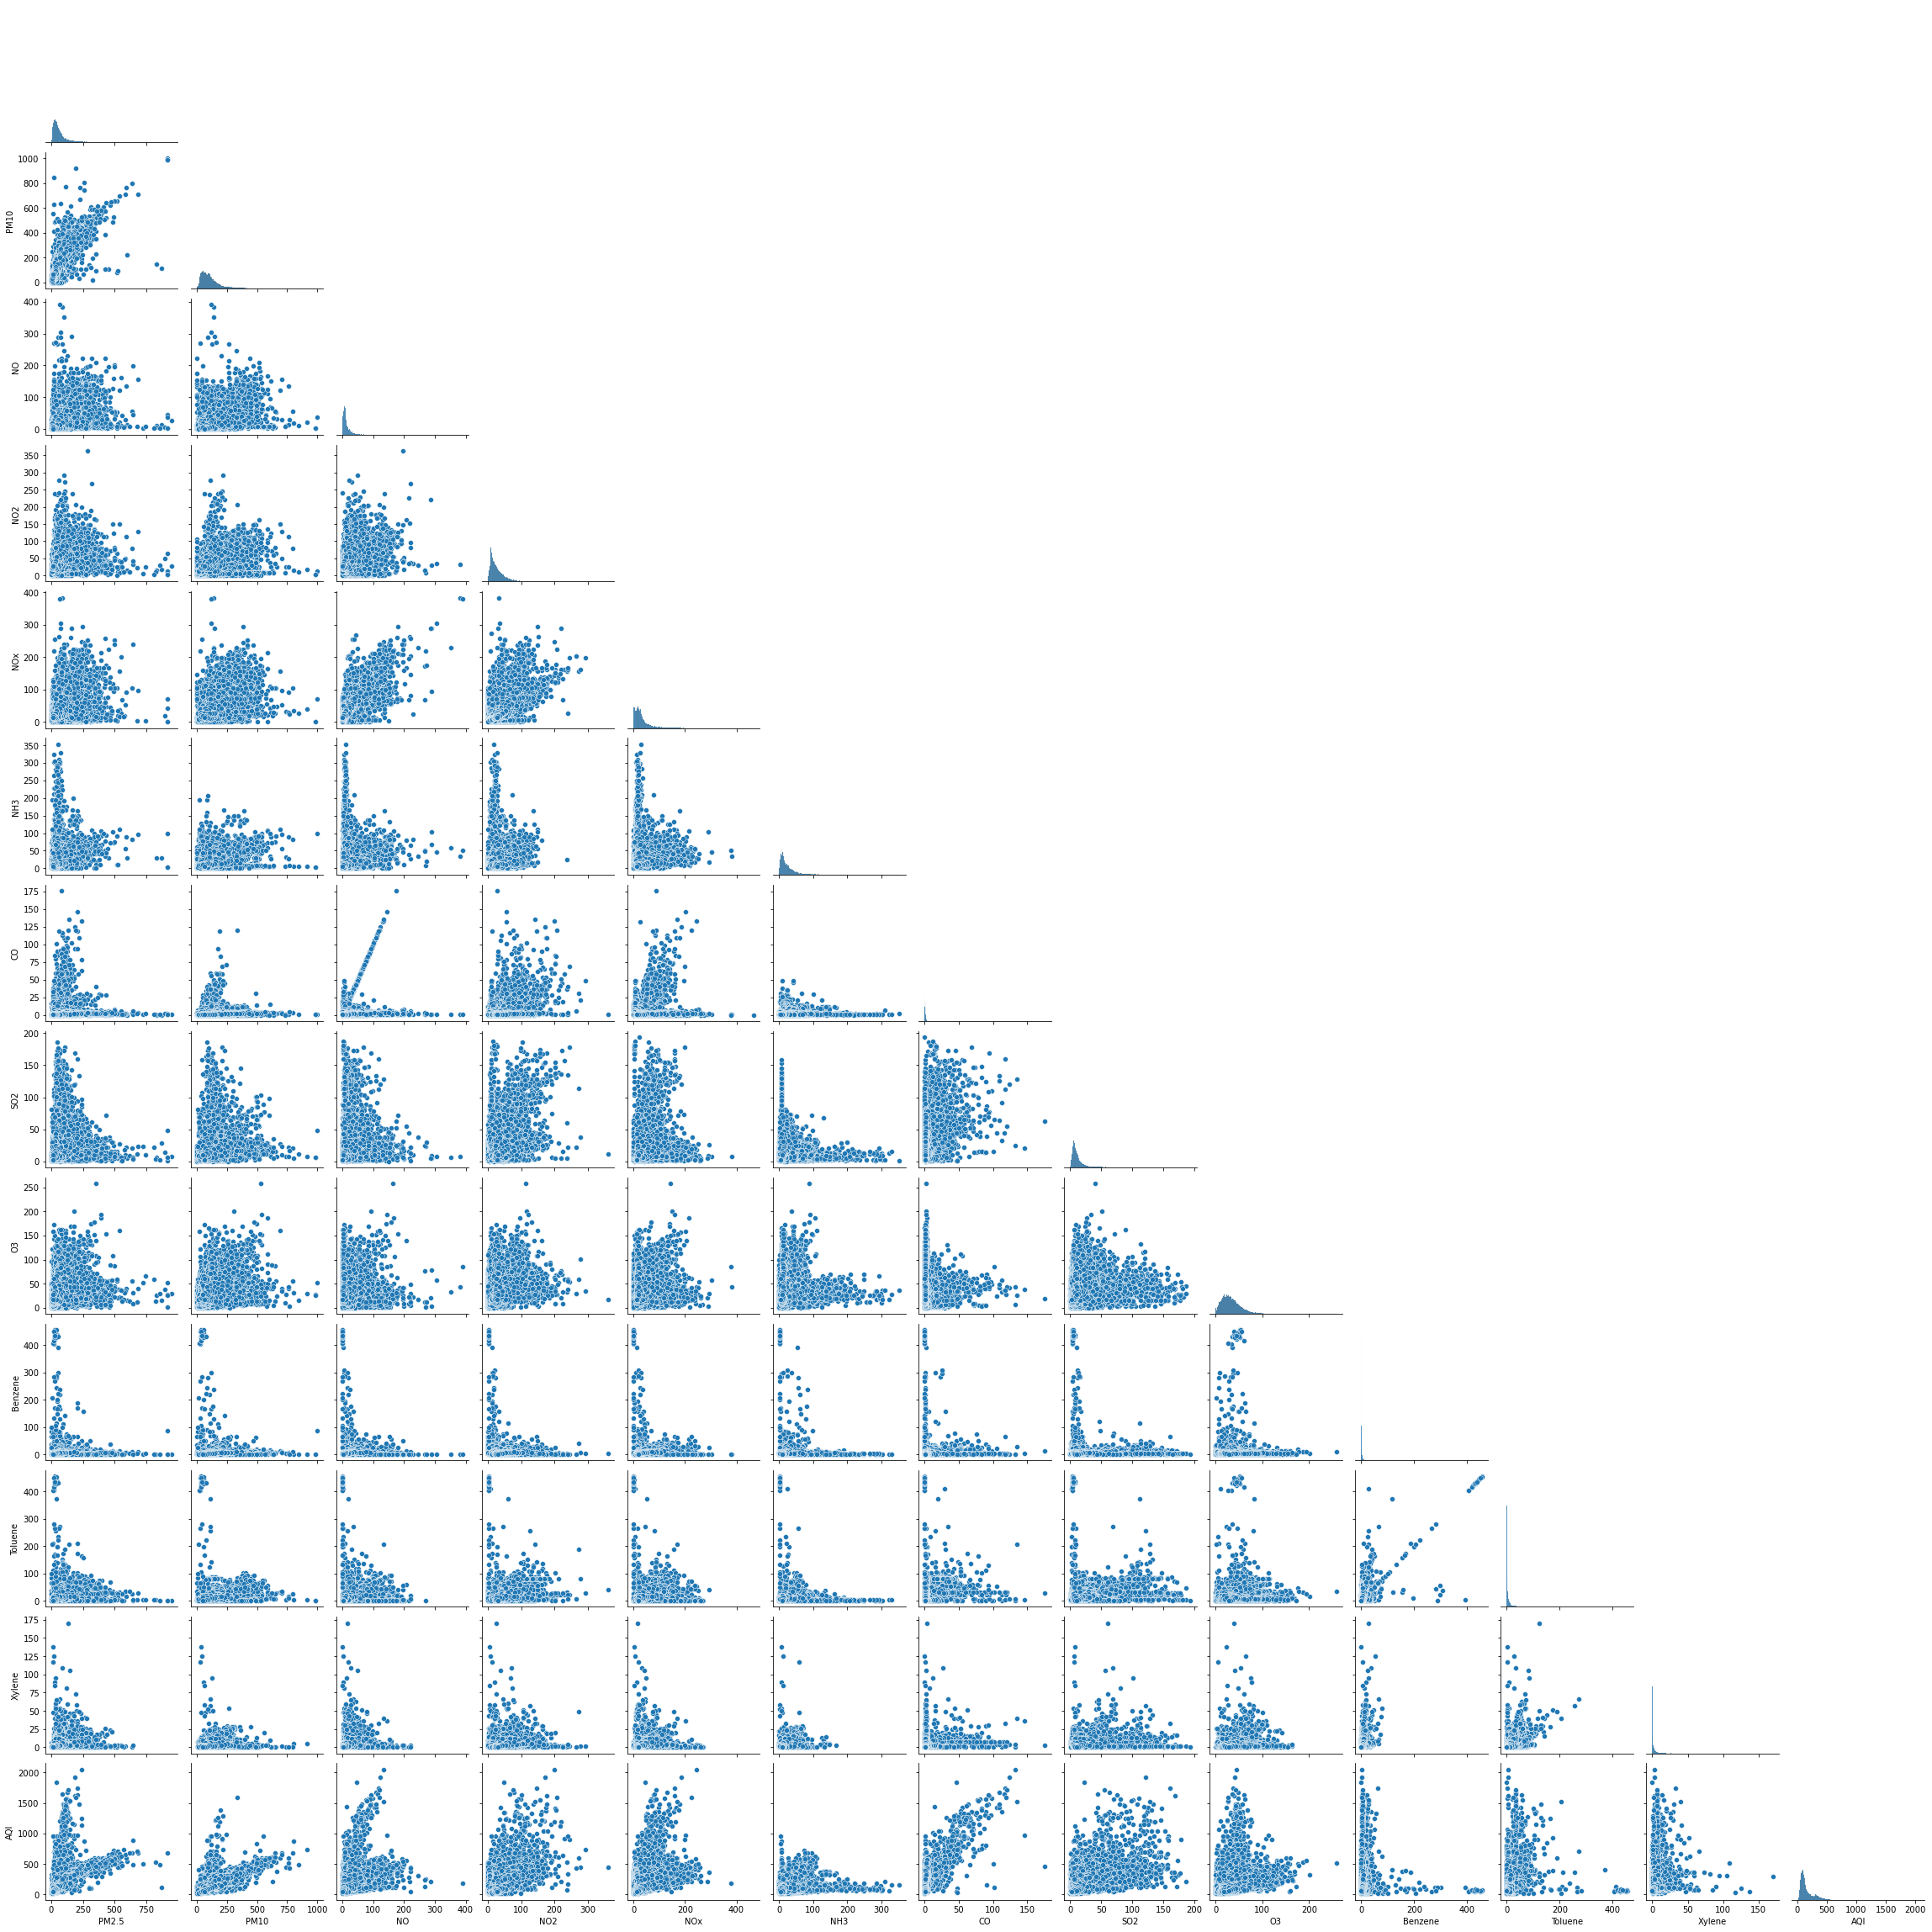

In [66]:
sns.pairplot(data=dataset,corner='True')

<AxesSubplot:xlabel='Date', ylabel='AQI'>

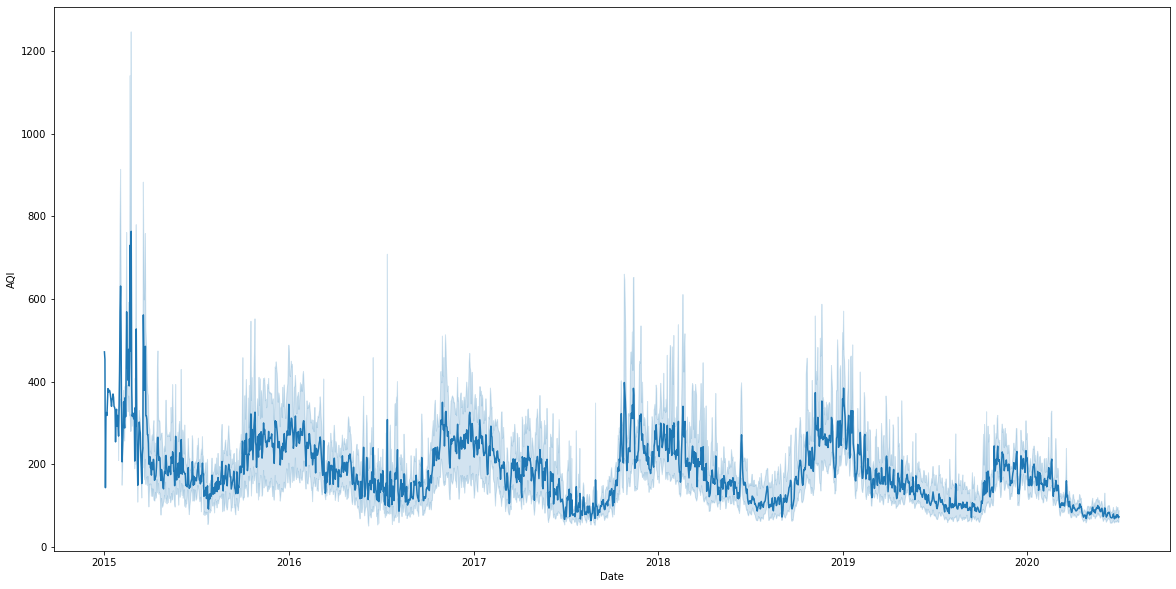

In [67]:
sns.lineplot(y='AQI',x='Date',data=dataset)

# Cleaning Data

**Fill missing values by KNN**

In [92]:
print('Number of empty values is ')
dataset.isna().sum()

Number of empty values is 


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [93]:
dataset_transform = dataset.copy(deep=True)

In [96]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
features_without_aqi =  ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']

for ele in features_without_aqi:
    dataset_transform[ele] = knn_imputer.fit_transform(dataset_transform[[ele]])

In [97]:
print('Number of empty values is ')
dataset_transform.isna().sum()

Number of empty values is 


City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [98]:
dataset_transform.sample(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
17847,Jorapokhar,2017-09-13,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.49143,3.28084,8.700972,3.070128,166.463581,NaN
28796,Visakhapatnam,2018-06-28,27.290000,70.270000,1.92000,38.390000,21.260000,8.610000,0.450000,17.860000,16.53000,4.77000,12.890000,3.460000,84.000000,Satisfactory
6805,Brajrajnagar,2018-07-08,31.450000,53.030000,4.70000,9.560000,14.250000,4.560000,2.190000,12.700000,8.26000,0.68000,8.700972,3.070128,103.000000,Moderate
28672,Visakhapatnam,2018-02-24,86.820000,256.850000,85.97000,90.430000,117.990000,16.130000,1.710000,29.370000,20.95000,11.15000,34.230000,9.540000,195.000000,Moderate
21403,Lucknow,2019-04-07,72.320000,118.127103,8.61000,30.700000,23.000000,22.470000,1.300000,6.750000,32.68000,0.48000,1.200000,3.070128,195.000000,Moderate


**Remove Outliers by IQR**

In [99]:
Q1 = dataset_transform.quantile(0.25)
Q3 = dataset_transform.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PM2.5      40.300000
PM10       38.812103
NO         11.364730
NO2        21.685000
NOx        21.345000
NH3        11.443476
CO          1.170000
SO2         8.441977
O3         21.990000
Benzene     3.040840
Toluene     7.420972
Xylene      1.070128
AQI        91.000000
dtype: float64


In [101]:
type(IQR)

pandas.core.series.Series

In [105]:
features_without_aqi =  ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']


In [108]:
def remove_outliers(df,features):
    for column in features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [109]:
dataset_ready = remove_outliers(dataset_transform,features_without_aqi)

In [111]:
dataset_ready.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000,16099.000000
mean,46.322834,92.401627,10.616636,21.514015,21.902376,18.027181,0.908090,9.623530,30.883916,1.658951,5.017494,2.337806,115.661222
std,24.174681,37.118881,6.884333,11.242534,12.758235,9.097328,0.695825,5.152751,13.857276,1.597491,4.245661,1.240422,52.540165
min,0.040000,5.820000,0.060000,0.010000,0.000000,0.010000,0.000000,0.410000,0.010000,0.000000,0.000000,0.000000,14.000000
25%,25.450000,59.670000,4.860000,11.580000,11.360000,10.180000,0.420000,5.440000,20.530000,0.150000,0.770000,1.285000,73.000000
50%,44.150000,112.530000,9.200000,22.070000,22.410000,23.483476,0.770000,8.770000,34.360000,1.130000,4.440000,3.070128,105.000000
75%,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,1.220000,14.531977,36.940000,3.280840,8.700972,3.070128,166.463581
max,132.840000,185.480000,35.170000,54.120000,62.060000,42.520000,2.760000,27.910000,67.410000,7.910000,20.410000,5.500000,699.000000


In [112]:
dataset_transform.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,129.064348
min,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000
75%,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000
max,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


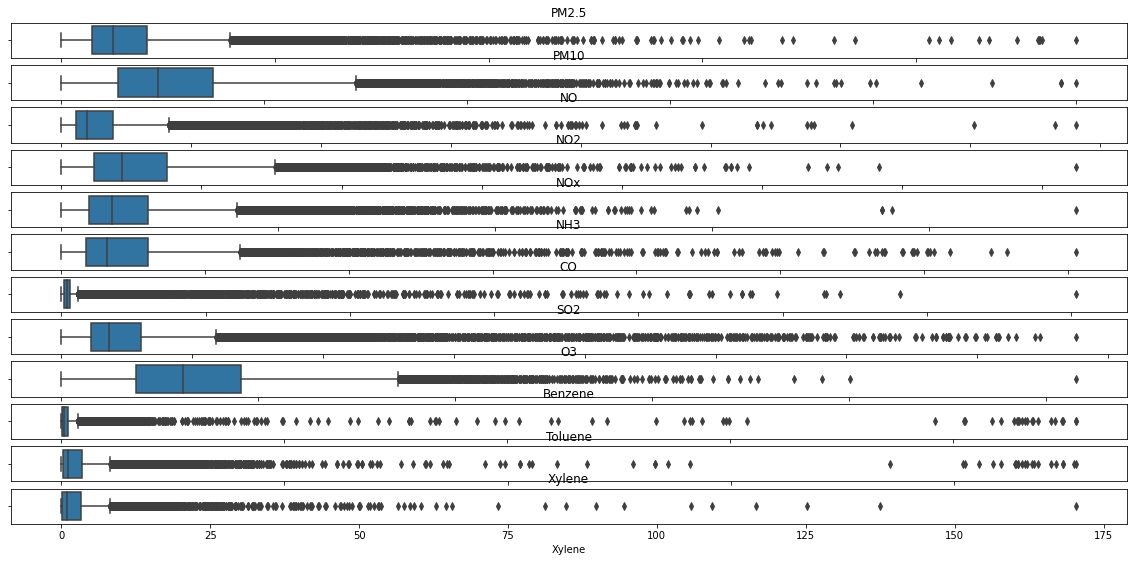

In [110]:
i = 1

for ele in features_without_aqi:
    plt.subplot(13,1,i)
    plt.title(ele)
    sns.boxplot(x=ele,data=dataset)
    i+= 1

In [127]:
dataset_ready = dataset_ready['AQI'].dropna()

**Drop Missing AQI values**

# Prophet

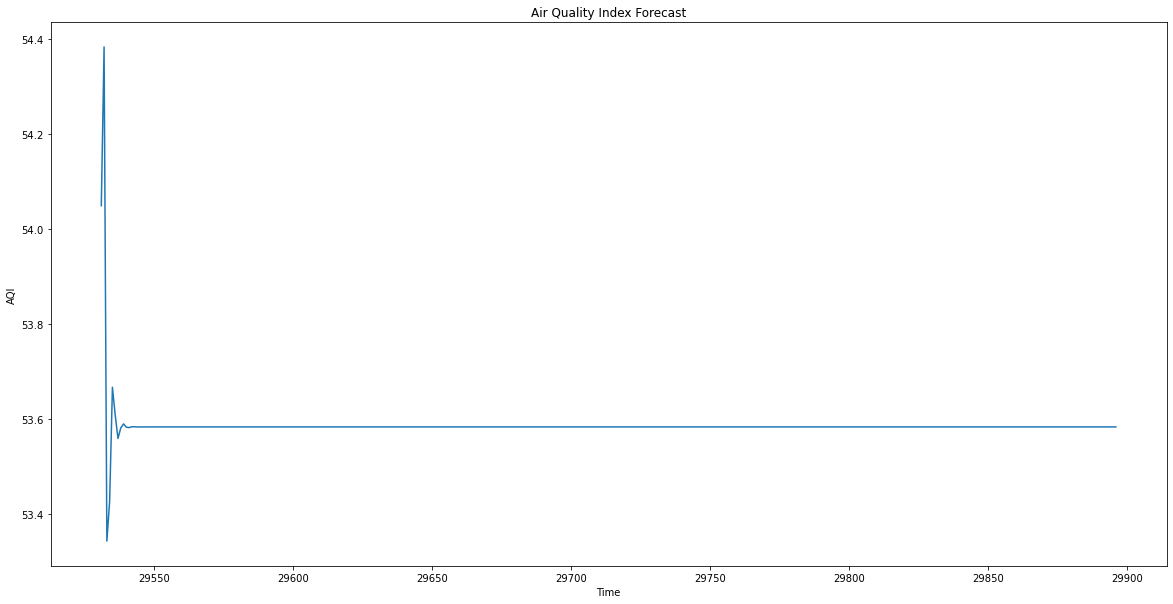

In [128]:
import pandas as pd
import statsmodels.api as sm

df = dataset
y = df["AQI"]

model = sm.tsa.ARIMA(y, order=(2,1,0)).fit()
predictions = model.predict(start=len(y), end=len(y)+365)

plt.plot(predictions)
plt.title("Air Quality Index Forecast")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.show()

# SARIMAX - Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors

In [131]:

#importing day-wise data of cities
df= pd.read_csv('../input/air-quality-data-in-india/city_day.csv')

df['Date'] = pd.to_datetime(df['Date'])

#visualizing the top rows of the dataset
df.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [132]:
cities_all = df.pivot_table(values='AQI', index=['Date'], columns='City')
cities_all=cities_all.add_suffix('_AQI')
cities=cities_all.resample(rule='MS').mean()
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,...,NaN,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,...,NaN,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
#form a new column containing India's AQI for every month by taking the average of all cities for that month
cities['India_AQI']=cities.mean(axis=1)
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.311828
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.284286
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,...,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN,258.875688
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,...,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN,193.815995
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,193.556272


In [8]:
%pip install statsmodels

  Using cached statsmodels-0.13.5-cp311-cp311-win_amd64.whl (9.0 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
     - -------------------------------------- 0.3/9.0 MB 7.9 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/9.0 MB 5.9 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.0 MB 5.7 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/9.0 MB 5.8 MB/s eta 0:00:02
     ----- ---------------------------------- 1.3/9.0 MB 5.8 MB/s eta 0:00:02
     ------ --------------------------------- 1.6/9.0 MB 5.8 MB/s eta 0:00:02
     ------- -------------------------------- 1.8/9.0 MB 5.7 MB/s eta 0:00:02
     --------- ------------------------------ 2.0/9.0 MB 5.6 MB/s eta 0:00:02
     ---------- ----------------------------- 2.3/9.0 MB 5.8 MB/s eta 0:00:02
     ----------- ---------------------------- 2.5/9.0 MB 5.8 MB/s eta 0:00:02
     ------------ --------------------------- 2.8/9.0 MB 5.7 MB/s eta 0:00:02
     ------------- -------------------------- 3.1/9.0 MB 5.8 MB/s eta 0

In [14]:
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [135]:
#dividing into train and test:
train_data=cities['India_AQI'][:'2018-12']
test_data=cities['India_AQI'][:'2019-12']

#Building the model:
model=SARIMAX(train_data,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results=model.fit()

#printing summry of model reults
results.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99058D+00    |proj g|=  2.98482D-01

At iterate    5    f=  4.84346D+00    |proj g|=  2.49630D-02

At iterate   10    f=  4.80666D+00    |proj g|=  1.30738D-02

At iterate   15    f=  4.78842D+00    |proj g|=  2.73922D-03

At iterate   20    f=  4.78776D+00    |proj g|=  4.84139D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     23      1     0     0   2.628D-06   4.788D+00
  F =   4.7877625468465075     

CONVERG

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            India_AQI   No. Observations:                   48
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -229.813
Date:                              Sat, 04 Feb 2023   AIC                            469.625
Time:                                      11:06:36   BIC                            478.876
Sample:                                  01-01-2015   HQIC                           473.106
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0645      0.574      0.112      0.911      -1.061       1.190
ma.L2         -0.9324      0.565     -1.649      0.099      -2.041       0.176
ar.S.L12       0.9183      0.097      9.440      0.000       0.728       1.109
ma.S.L12      -0.4473      0.301     -1.485      0.138      -1.038       0.143
sigma2       767.1154    426.915      1.797      0.072     -69.622    1603.853
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 3.61
Prob(Q):                              0.63   Prob(JB):                         0.16
Heteroskedasticity (H):               0.24   Skew:                            -0.66
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [3]:
import pickle

In [144]:
pickle.dump(model, open('model.pkl', 'wb'))

NameError: name 'test_data' is not defined

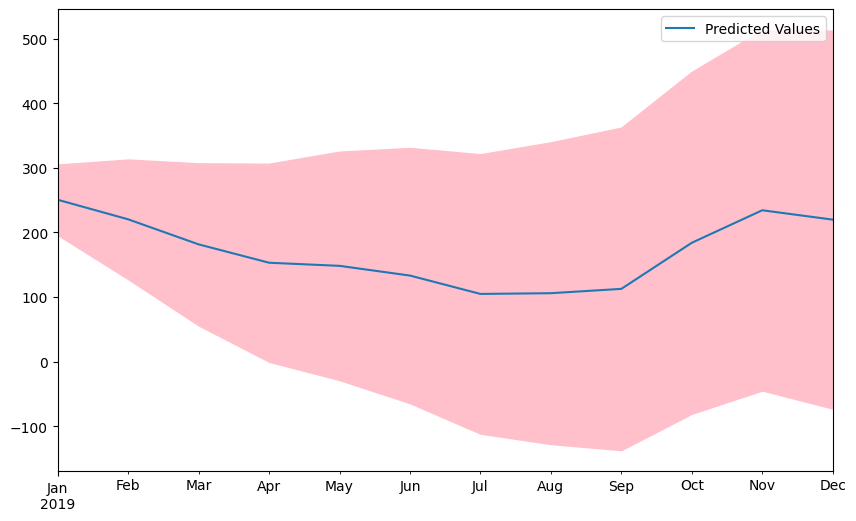

In [28]:
fig, ax= plt.subplots(figsize=(10,6))

#predict the next 12 months values to compare with the test dataset
forecasts = results.get_forecast(steps=12, dynamic=True)

#find the confidence intervals
confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']

#plot the forecasted mean data for the next 12 months and the confidence interval
forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

#plotting the actual value from test data
test_data.plot(legend=True, ax=ax)

In [15]:
loaded = ARIMAResults.load('model.pkl')

AttributeError: type object 'ARIMAResults' has no attribute 'load'


    model = pickle.load(open("model.pkl", "rb"))
    # Get the data from the POST request.
    data = request.get_json(force=True)
    # Make prediction using model loaded from disk as per the data.
    prediction = model.predict([np.array(list(data.values()))])
    # Take the first value of prediction
    output = prediction[0]
    return jsonify(output)


In [11]:
import numpy as np

In [24]:

model = pickle.load(open("model.pkl", "rb"))

results = model.fit()
# Get the data from the POST request.
# data = request.get_json(force=True)
# Make prediction using model loaded from disk as per the data.
prediction = results.get_forecast(steps=10, dynamic=True)
# Take the first value of prediction
output = prediction.predicted_mean
print(output)
# return jsonify(output)


2019-01-01    250.591648
2019-02-01    220.301935
2019-03-01    181.543023
2019-04-01    153.112449
2019-05-01    148.288424
2019-06-01    133.230752
2019-07-01    104.801498
2019-08-01    105.950266
2019-09-01    112.668209
2019-10-01    184.036908
Freq: MS, Name: predicted_mean, dtype: float64


c:\Users\prsdj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [22]:
type(output)

pandas.core.series.Series

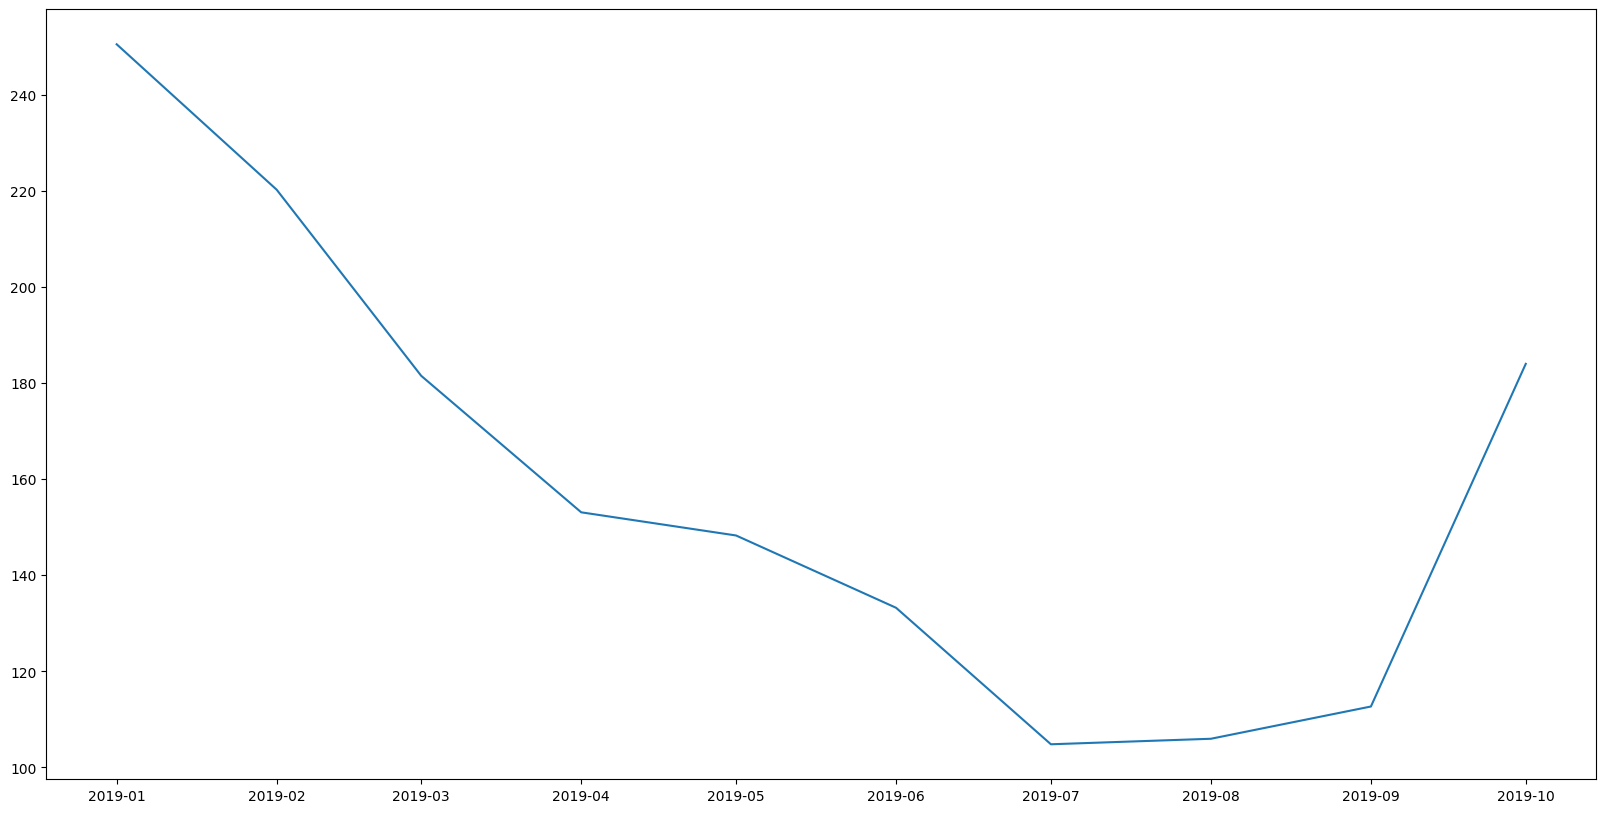

In [29]:
plt.plot(output)